In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from collections import Counter
from string import punctuation

In [2]:
df = pd.read_csv("./data/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text().lower()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

In [4]:
reviews = list(df['review'])
all_text = ' '.join(reviews)
all_text2 = ''.join([c for c in all_text if c not in punctuation])
words = all_text2.split()
vocab = list(set(words))

In [5]:
count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [6]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
len(vocab_to_int)

222701

In [7]:
reviews_split = []
for r in reviews:
    sen = []
    for c in r:
        if c not in punctuation:
            sen.append(c)
    reviews_split.append("".join(sen))

In [8]:
reviews_split[:5]

['one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictu

In [9]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[27, 4, 1, 77, 1929, 42, 1058, 11, 100, 144, 39, 507, 3339, 393, 457, 25, 3146, 33, 22, 204, 13, 10, 6, 593, 46, 582, 14, 7542, 87, 145, 11, 3220, 68, 41, 3339, 12, 28, 5509, 2, 14964, 131, 4, 584, 60, 282, 7, 204, 35, 1, 661, 137, 1723, 68, 10, 6, 20, 3, 117, 15, 1, 8156, 5707, 38, 11583, 10, 117, 2479, 54, 5959, 14, 5619, 5, 1457, 381, 38, 584, 28, 6, 3383, 7, 1, 351, 339, 4, 1, 61031, 6, 461, 3339, 13, 11, 6, 1, 11410, 344, 5, 1, 15572, 6799, 2538, 1056, 61032, 8, 2604, 1365, 19, 24632, 533, 32, 4683, 2496, 4, 1, 1197, 112, 30, 1, 7005, 24, 2951, 12693, 2, 405, 61033, 37, 17027, 6, 20, 317, 19, 1, 5027, 3693, 533, 6, 340, 5, 83365, 8283, 39961, 14965, 5116, 7734, 2439, 2, 17028, 61034, 328, 9083, 7324, 13108, 2, 8534, 33912, 22, 108, 224, 21280, 56, 124, 1, 267, 1291, 4, 1, 117, 6, 663, 5, 1, 185, 11, 8, 260, 112, 77, 254, 547, 2964, 818, 177, 1262, 4291, 15, 2472, 1092, 818, 1400, 818, 83366, 146, 969, 180, 1, 87, 393, 9, 119, 200, 3220, 68, 13, 37, 1569, 8, 12, 2188, 9, 395, 124,

In [10]:
labels_split = list(df['sentiment'])
print(labels_split[:5])

['positive', 'positive', 'positive', 'negative', 'positive']


In [11]:
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

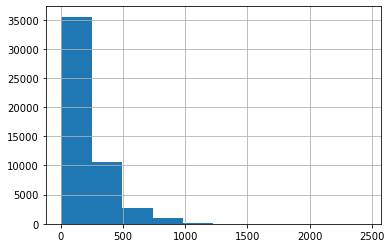

count    50000.000000
mean       226.236660
std        167.608553
min          4.000000
25%        124.000000
50%        170.000000
75%        274.000000
max       2450.000000
dtype: float64

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [13]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l<500 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l< 500 ]

In [14]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [15]:
len(reviews_int), len(encoded_labels)

(46277, 46277)

In [16]:
seq_length = 0
for i in reviews_int:
    if len(i) > seq_length: seq_length = len(i)

In [17]:
seq_length

499

In [18]:
features = pad_features(reviews_int, seq_length)

In [19]:
features.shape

(46277, 499)

In [20]:
np.array(encoded_labels)

array([1, 1, 1, ..., 0, 0, 0])

In [21]:
split_frac = 0.8
len_feat = features.shape[0]
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [22]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(np.array(train_y)))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(np.array(valid_y)))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(np.array(test_y)))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [23]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 499])
Sample input: 
 tensor([[   0,    0,    0,  ...,    3,   48,   18],
        [   0,    0,    0,  ...,   19, 1762, 1594],
        [   0,    0,    0,  ..., 2274,   19, 1011],
        ...,
        [   0,    0,    0,  ...,  751,  751,  751],
        [   0,    0,    0,  ...,    4,   28,  535],
        [   0,    0,    0,  ...,   18,   13,   72]], dtype=torch.int32)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 1], dtype=torch.int32)


In [24]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [25]:
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(222702, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [29]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing
train_on_gpu = False
counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available

net.to(device)

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        
        inputs, labels = inputs.to(device), labels.to(device)

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.to(device), labels.to(device)

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

KeyboardInterrupt: 

In [ ]:
torch.cuda.is_available()